# **Import Libraries and modules**

In [0]:
# https://keras.io/
!pip install -q keras
import keras

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


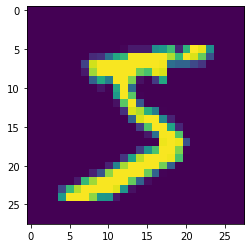

In [0]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

(60000, 28, 28)


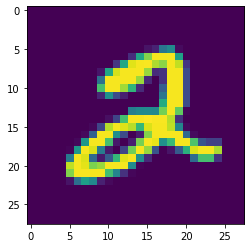

In [0]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[5])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [0]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(10, 1, activation='relu'))
model.add(Convolution2D(10, 26))
model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """


In [0]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 26, 26, 10)        330       
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 1, 1, 10)          67610     
_________________________________________________________________
flatten_4 (Flatten)          (None, 10)                0         
_________________________________________________________________
activation_3 (Activation)    (None, 10)                0         
Total params: 68,260
Trainable params: 68,260
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [0]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/10
60000/60000 [==============================] - 7s 124us/step - loss: 0.2088 - acc: 0.9397
Epoch 2/10
60000/60000 [==============================] - 7s 117us/step - loss: 0.0719 - acc: 0.9786
Epoch 3/10
60000/60000 [==============================] - 7s 116us/step - loss: 0.0517 - acc: 0.9838
Epoch 4/10
60000/60000 [==============================] - 7s 116us/step - loss: 0.0407 - acc: 0.9869
Epoch 5/10
60000/60000 [==============================] - 7s 116us/step - loss: 0.0319 - acc: 0.9899
Epoch 6/10
60000/60000 [==============================] - 7s 118us/step - loss: 0.0253 - acc: 0.9918
Epoch 7/10
60000/60000 [==============================] - 7s 116us/step - loss: 0.0209 - acc: 0.9932
Epoch 8/10
60000/60000 [==============================] - 7s 116us/step - loss: 0.0148 - acc: 0.9954
Epoch 9/10
60000/60000 [==============================] - 7s 116us/step - loss: 0.0131 - acc: 0.9956
Epoch 10/10
60000/60000 [==============================] - 7s 116us/step - loss: 0.0107 - a

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [0]:
print(score)

[0.08559512307422629, 0.9812]


In [0]:
y_pred = model.predict(X_test)

In [0]:
print(y_pred[:9])
print(y_test[:9])

[[1.94167364e-17 9.49445517e-18 9.00049891e-13 4.65324312e-09
  6.65431772e-18 5.83933767e-16 6.31516100e-29 1.00000000e+00
  9.67548871e-12 1.78856221e-10]
 [3.93286629e-17 5.34747358e-15 1.00000000e+00 4.30712146e-15
  2.75052902e-26 1.97202275e-19 5.23734571e-12 2.73934194e-29
  1.49163759e-17 2.99086376e-22]
 [1.81598505e-08 9.99879956e-01 1.12807527e-06 1.11765160e-10
  1.13941074e-04 5.03598864e-11 3.94593219e-10 1.23927506e-07
  4.92419576e-06 1.27491878e-10]
 [1.00000000e+00 4.11829239e-17 4.12024947e-09 5.13721878e-13
  4.18185361e-17 3.77094020e-14 3.48842150e-10 1.84020971e-13
  1.87640979e-11 1.28253796e-10]
 [1.99311422e-12 2.86660990e-16 6.87412627e-11 2.15467783e-10
  9.99999523e-01 2.00242940e-17 8.37085392e-14 1.22846205e-10
  1.80523846e-10 4.48677270e-07]
 [3.56690753e-11 9.99995112e-01 8.09013034e-09 2.05322998e-12
  1.61547996e-06 1.74284771e-14 2.00042429e-13 3.10258952e-06
  7.91200279e-08 2.18481119e-11]
 [9.88787277e-20 1.58130817e-11 2.81426021e-10 5.43113514e

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

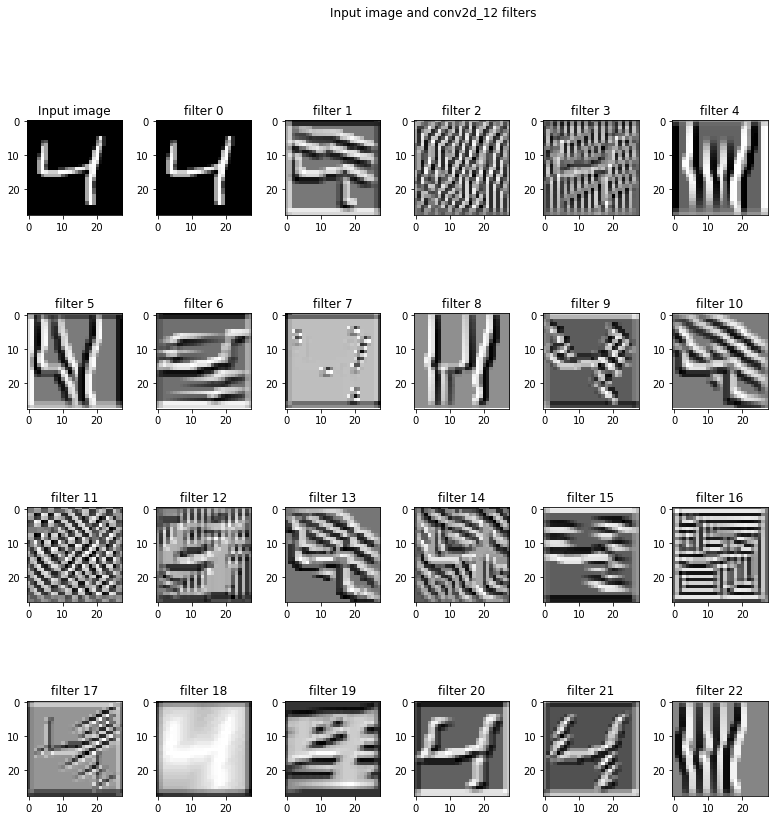

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_12'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()

TRYING OUT SOME OTHER ARCHITECTURE IN ORDER TO GET BETTER ACCURACY.

In [0]:
from keras.layers import Activation
model = Sequential()

input_shape=(28,28,1)
num_classes = 10

model = Sequential()

model.add(Convolution2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape))
model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(128, (3, 3), activation='relu'))
model.add(Convolution2D(128, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(num_classes, activation='softmax'))

In [0]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 10, 10, 128)       73856     
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 6, 6, 128)         409728    
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 3, 3, 128)         0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 1152)            

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [0]:
model.fit(X_train, Y_train, batch_size=128, nb_epoch=10, verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/10
60000/60000 [==============================] - 5s 83us/step - loss: 0.1517 - acc: 0.9539
Epoch 2/10
60000/60000 [==============================] - 4s 71us/step - loss: 0.0367 - acc: 0.9883
Epoch 3/10
60000/60000 [==============================] - 4s 71us/step - loss: 0.0244 - acc: 0.9924
Epoch 4/10
60000/60000 [==============================] - 4s 72us/step - loss: 0.0168 - acc: 0.9947
Epoch 5/10
60000/60000 [==============================] - 4s 72us/step - loss: 0.0141 - acc: 0.9954
Epoch 6/10
60000/60000 [==============================] - 4s 72us/step - loss: 0.0114 - acc: 0.9965
Epoch 7/10
60000/60000 [==============================] - 4s 71us/step - loss: 0.0097 - acc: 0.9970
Epoch 8/10
60000/60000 [==============================] - 4s 71us/step - loss: 0.0074 - acc: 0.9975
Epoch 9/10
60000/60000 [==============================] - 4s 72us/step - loss: 0.0071 - acc: 0.9978
Epoch 10/10
60000/60000 [==============================] - 4s 71us/step - loss: 0.0059 - acc: 0.9983

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [0]:
print(score)

[0.022148930195983303, 0.9943]


In [0]:
y_pred = model.predict(X_test)

In [0]:
print(y_pred[:9])
print(y_test[:9])

[[5.0778960e-15 8.1182978e-14 8.5847497e-13 3.6563839e-11 2.8473737e-17
  1.8070741e-15 1.9547421e-21 1.0000000e+00 1.3954723e-15 1.5212248e-11]
 [1.0060192e-10 8.5134394e-10 1.0000000e+00 5.8235243e-15 2.7453231e-12
  2.4806971e-21 2.3961993e-12 7.9982443e-18 1.3131548e-11 2.6826979e-17]
 [1.4745850e-08 9.9997580e-01 1.2669358e-08 1.2206727e-08 1.5887208e-06
  1.4072540e-07 3.8962099e-07 2.0110059e-05 1.5312099e-06 5.4599315e-07]
 [9.9999762e-01 4.9503923e-13 5.8676973e-11 5.2013904e-10 5.3936342e-13
  2.1519730e-12 2.3897653e-06 3.4648282e-09 1.9019027e-10 2.6571195e-08]
 [3.2960247e-14 1.8386555e-13 1.3676288e-14 1.5086934e-14 1.0000000e+00
  5.8683290e-14 1.0345792e-11 1.5174463e-14 1.9683782e-11 3.0032524e-10]
 [4.7849582e-09 9.9994159e-01 5.9272509e-08 1.7610366e-09 1.4373458e-06
  2.0019930e-09 1.5639118e-07 5.5682518e-05 3.2443936e-07 6.3842691e-07]
 [8.4515232e-21 3.5130617e-13 7.2078702e-12 5.7550764e-18 1.0000000e+00
  2.5077557e-14 1.3072052e-14 4.8193775e-12 7.3385398e-10 

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

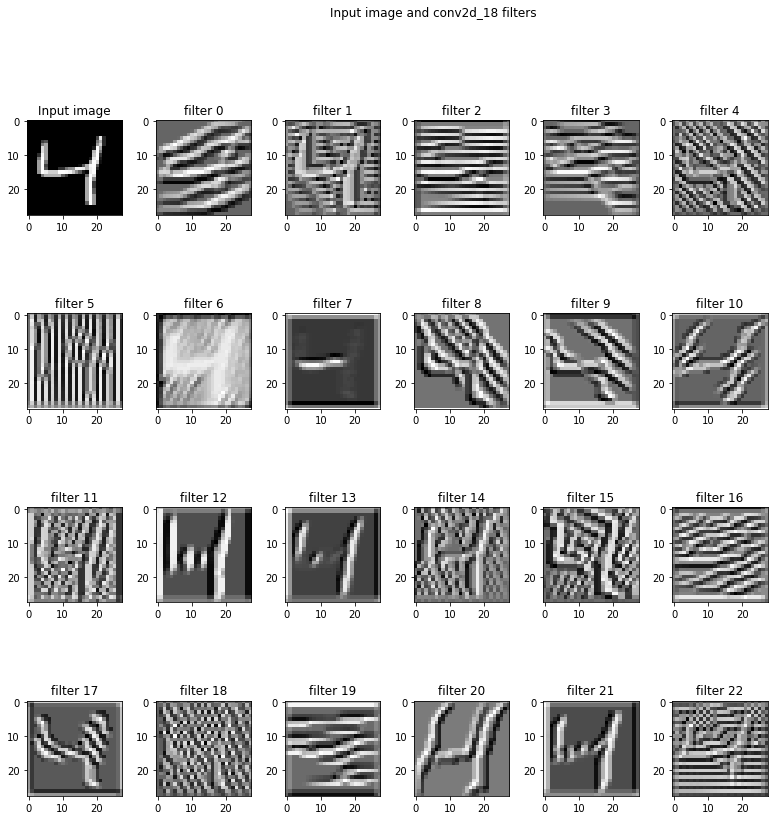

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_18'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()